## A script to visualize MW self reports over time
_© 2021 Colin Conrad_

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats

## Import the responses into Pandas

In [2]:
sns.set_theme() # set seaborn

raw = pd.read_csv("experience_samples.csv") 

In [3]:
raw.head()

,participant_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
0,1,2,1,2,1,3,2,5,1,4,1
1,2,3,1,1,1,1,2,3,1,4,2
2,3,4,2,1,1,3,1,2,3,2,1
3,4,2,1,3,4,1,3,2,4,3,2
4,5,2,2,2,3,3,4,3,3,3,3


## Use Pandas' "melt" method to transform the variables

In [4]:
d = raw.melt("participant_id")
d.head()

,participant_id,variable,value
0,1,p1,2
1,2,p1,3
2,3,p1,4
3,4,p1,2
4,5,p1,2


In [5]:
d = d.replace("p1", 4.58)
d = d.replace("p2", 5.53)
d = d.replace("p3", 10.33)
d = d.replace("p4", 15.13)
d = d.replace("p5", 30.13)
d = d.replace("p6", 42.83)
d = d.replace("p7", 53.25)
d = d.replace("p8", 56.25)
d = d.replace("p9", 68.11)
d = d.replace("p10", 71.11)

[Text(0.5, 0, 'Time (minutes)'),
 Text(0, 0.5, 'Reported degree of mind wandering')]

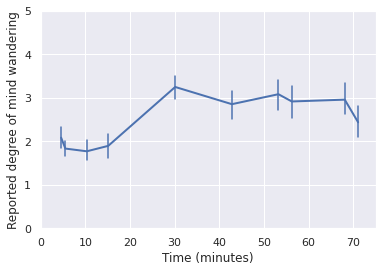

In [6]:
sns_plot = sns.lineplot(x="variable", 
                   y="value", 
                   markers=True, 
                   legend=False,
                   linewidth=2,
                   err_style="bars", 
                   ci=95,
                   data=d)

sns_plot.set(ylim=(0, 5))
sns_plot.set(xlim=(0, 75))
sns_plot.set(xlabel='Time (minutes)', ylabel='Reported degree of mind wandering')

In [7]:
sns_plot.figure.dpi = 300
sns_plot.figure.savefig('exp_over_time.png')